In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data:

In [2]:
files=[]
files.append('../data/sand_900.0_10.0_22.937_Mon_Nov__4_12:08:43_2019')
files.append('../data/sand_900.0_10.0_22.25_Mon_Nov__4_12:37:56_2019')
files.append('../data/sand_900.0_10.0_22.562_Mon_Nov__4_13:07:53_2019')
files.append('../data/sand_960.0_10.0_24.375_Mon_Nov__4_13:37:13_2019')
files.append('../data/sand_1010.0_10.0_26.312_Mon_Nov__4_14:06:45_2019')
files.append('../data/sand_1060.0_10.0_27.375_Mon_Nov__4_14:28:19_2019')
files.append('../data/sand_1110.0_10.0_27.25_Mon_Nov__4_14:43:04_2019')
files.append('../data/sand_1160.0_10.0_26.937_Mon_Nov__4_14:58:00_2019')
files.append('../data/sand_900.0_10.0_26.875_Mon_Nov__4_15:08:46_2019')

View raw data and choose initial cut points:

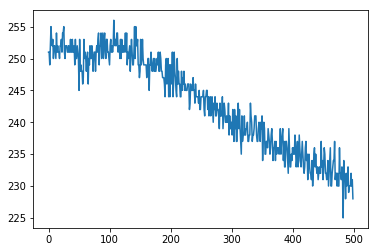

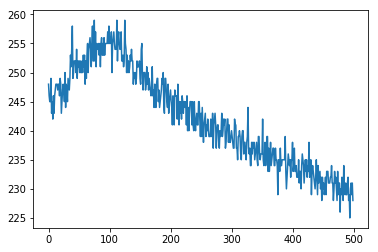

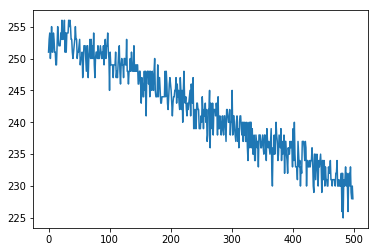

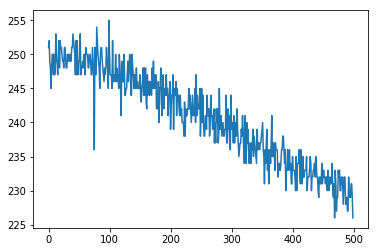

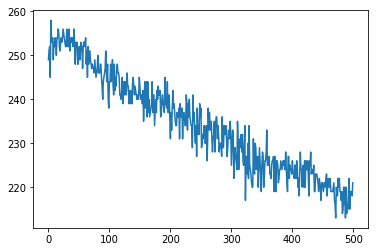

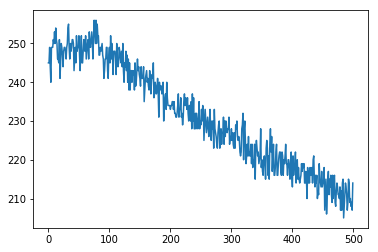

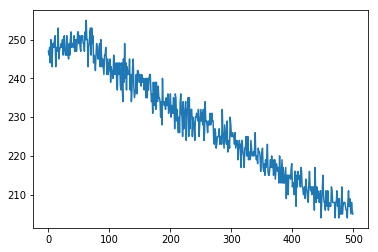

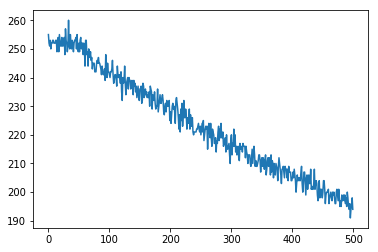

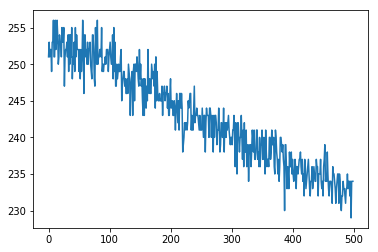

In [3]:
for f in files:
    plt.figure()
    plt.plot(np.loadtxt(f)[1,:500])

Make data frames:

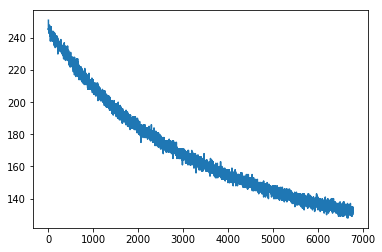

In [4]:
tmp = np.loadtxt(files[8])
tmp = tmp[:,np.max(np.where(tmp[1,:]>250)):]
plt.figure()
plt.plot(tmp[1,:])

In [5]:
frames = []
for f in files:
    tmp = np.loadtxt(f)
    tmp = tmp[:,np.max(np.where(tmp[1,:]>250)):]
    tmp = tmp.T
    tmp[:,1] = (tmp[0,1] - tmp[:,1]) / 10. * np.pi * (2.25 * 2.54)**2
    frames.append(pd.DataFrame(tmp,columns=["time","volume","pressure"]))

In [6]:
frames[0].head()

,time,volume,pressure
0,113.607335,0.000000,951.53
1,113.798966,30.782479,951.54
2,113.958739,41.043306,951.54
3,114.150727,61.564959,951.47
4,114.342273,71.825785,951.48


Plot the raw data

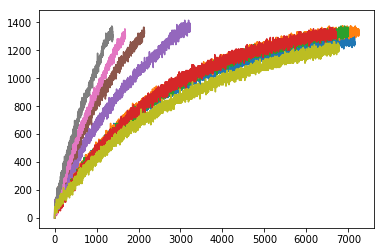

In [7]:
for fr in frames:
    plt.plot(fr['volume'])

Smooth data and find point where 800 mL is reached.

In [8]:
smooth = []
for fr in frames:
    smooth.append(fr['volume'].ewm(span=50).mean())

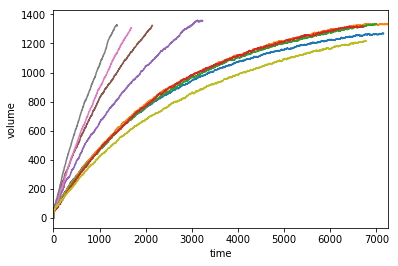

In [9]:
plt.figure()
for s in smooth:
    s.plot()
    plt.xlabel('time')
    plt.ylabel('volume')

In [10]:
motor_setting = [951., 951., 951., 960., 1010., 1060., 1110., 1160., 951.]
cp = []
for s in smooth:
    cp.append(np.min(np.where(s>=800))/ 10.) 
data = np.concatenate([np.array(motor_setting).reshape(-1,1),np.array(cp).reshape(-1,1)],axis=1)
pdata = pd.DataFrame(data, columns=["motor_setting","time_800"])
pdata

,motor_setting,time_800
0,951.0,217.9
1,951.0,205.7
2,951.0,216.3
3,960.0,211.4
4,1010.0,134.4
5,1060.0,96.6
6,1110.0,86.6
7,1160.0,67.8
8,951.0,263.2


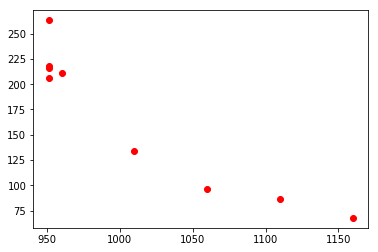

In [11]:
plt.figure()
plt.plot(pdata["motor_setting"],pdata["time_800"],'ro')

[-6.00635678e-03  1.10938801e+01]


Text(0, 0.5, 'log(crossing time) [log(s)]')

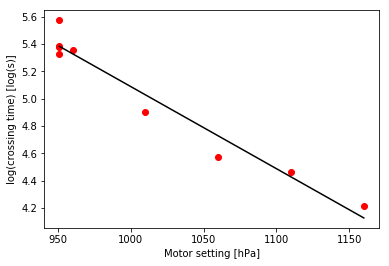

In [12]:
plt.figure()
plt.plot((pdata["motor_setting"]),np.log(pdata["time_800"]),'ro')
fit = np.polyfit((pdata["motor_setting"]),np.log(pdata["time_800"]),1)
print(fit)
x = np.linspace(np.min(pdata["motor_setting"]),np.max(pdata["motor_setting"]))
y = fit[0] * x + fit[1]
plt.plot(x,y,'k-')
plt.xlabel("Motor setting [hPa]")
plt.ylabel("log(crossing time) [log(s)]")